In [9]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # Usaremos para moda, se necessário, e outras funções estatísticas

# Configurações para melhores visualizações
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 📊 Análise Exploratória de Dados: Universo Pokémon! ⚡⚡

Bem-vindos à nossa jornada de análise de dados no fascinante universo Pokémon! Neste notebook, vamos explorar um conjunto de dados contendo informações sobre diferentes espécies de Pokémon, suas estatísticas de combate, tipos e outras características.

Nosso foco será a **estatística descritiva**. Vamos aprender a:
* Calcular medidas de tendência central (média, mediana, moda).
* Analisar medidas de dispersão (amplitude, variância, desvio padrão, intervalo interquartil).
* Criar e interpretar tabelas de frequência.
* Visualizar distribuições de dados com histogramas e boxplots.
* Investigar correlações entre diferentes atributos dos Pokémon.
* Entender o conceito básico de amostragem.

**Objetivo:** Ao final deste notebook, você será capaz de resumir, descrever e visualizar as principais características de um conjunto de dados, extraindo insights valiosos sobre os Pokémon.

**Dataset:** Utilizaremos o dataset "Pokemon.csv", que contém as seguintes colunas:

* `#`: ID numérico do Pokémon (não usaremos para análise estatística, mas é um identificador).
* `Name`: Nome do Pokémon.
* `Type 1`: Tipo primário do Pokémon (ex: Grass, Fire, Water).
* `Type 2`: Tipo secundário do Pokémon (alguns Pokémon não possuem).
* `HP`: Pontos de Vida (Health Points) - indica a vitalidade do Pokémon.
* `Attack`: Ataque físico - indica o poder de ataques físicos.
* `Defense`: Defesa física - indica a resistência a ataques físicos.
* `Sp. Atk`: Ataque Especial - indica o poder de ataques especiais.
* `Sp. Def`: Defesa Especial - indica a resistência a ataques especiais.
* `Speed`: Velocidade - determina a ordem de ataque em batalhas.
* `Generation`: Geração em que o Pokémon foi introduzido.
* `Legendary`: Booleano (True/False) indicando se o Pokémon é Lendário.

**Nota sobre a coluna `Type 2`:** Esta coluna possui alguns valores ausentes (NaN - Not a Number), pois nem todos os Pokémon têm um segundo tipo. Para simplificar nossa análise descritiva inicial, **não focaremos nesta coluna para cálculos que exijam dados completos em todas as linhas**, mas podemos explorá-la separadamente em contagens, por exemplo. O importante é estar ciente desses dados ausentes!

Vamos começar carregando nossos dados!

In [10]:
# Carregar o dataset
df_pokemon = pd.read_csv('Pokemon.csv')

# Visualizar as primeiras linhas do dataframe
print("Primeiras 5 linhas do dataset:")
df_pokemon.head()

Primeiras 5 linhas do dataset:


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [11]:
# Obter informações gerais sobre o dataframe
print("\nInformações gerais do dataset:")
df_pokemon.info()



Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


## 🚀 Exploração Inicial dos Dados

Acabamos de carregar nosso dataset! A função `head()` nos mostra as primeiras linhas, e `info()` nos dá um resumo das colunas, seus tipos de dados e a quantidade de valores não nulos.

Observamos que:
* Temos 800 Pokémon no nosso dataset.
* A coluna `#` é um identificador numérico.
* `Name`, `Type 1`, `Type 2` são do tipo `object` (strings).
* As colunas de estatísticas (`HP`, `Attack`, etc.), `Generation` são numéricas (`int64`).
* `Legendary` é do tipo `bool` (True/False).
* A coluna `Type 2` tem 386 valores ausentes, como esperado.

Para facilitar algumas análises, podemos renomear colunas com espaços ou caracteres especiais, se houver. No nosso caso, `Sp. Atk` e `Sp. Def` são exemplos.

**Decisão sobre `Type 2`:** Para as análises de estatísticas descritivas numéricas principais, vamos focar nas colunas que não possuem (ou possuem poucos) valores ausentes. Podemos analisar `Type 2` separadamente quando formos ver frequências de tipos.

In [12]:
# Renomear colunas para facilitar o acesso (opcional, mas recomendado)
df_pokemon = df_pokemon.rename(columns={
    '#': 'ID',
    'Type 1': 'Type1',
    'Type 2': 'Type2',
    'HP': 'HP',
    'Attack': 'Attack Power',
    'Defense': 'Defense Power',
    'Sp. Atk': 'Sp_Atk',
    'Sp. Def': 'Sp_Def',
    'Speed': 'Speed',
    'Generation': 'Generation',
    'Legendary': 'Legendary'
})

# Confirmar as novas colunas
print("Nomes das colunas após renomear:")
print(df_pokemon.columns)

Nomes das colunas após renomear:
Index(['ID', 'Name', 'Type1', 'Type2', 'HP', 'Attack Power', 'Defense Power',
       'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


## 🔢 Estatísticas Descritivas Gerais

Pandas oferece uma função muito útil, `.describe()`, que calcula várias estatísticas descritivas para as colunas numéricas de uma vez!

In [13]:
# Estatísticas descritivas para colunas numéricas
print("Estatísticas descritivas das colunas numéricas:")
df_pokemon.describe()

Estatísticas descritivas das colunas numéricas:


,ID,HP,Attack Power,Defense Power,Sp_Atk,Sp_Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [14]:
# Podemos também incluir colunas não numéricas (como 'Type1') para ver contagens e valores únicos
print("\nEstatísticas descritivas incluindo tipos 'object' e 'bool':")
df_pokemon.describe(include=['object', 'bool'])


Estatísticas descritivas incluindo tipos 'object' e 'bool':


,Name,Type1,Type2,Legendary
count,800,800,414,800
unique,800,18,18,2
top,Pumpkaboo Super Size,Water,Flying,False
freq,1,112,97,735


## 🎯 Medidas de Tendência Central

Estas medidas nos dão uma ideia do valor "típico" ou "central" em um conjunto de dados.

* **Média (Mean):** A soma de todos os valores dividida pelo número de valores. Sensível a outliers (valores extremos).
* **Mediana (Median):** O valor do meio quando os dados estão ordenados. Menos sensível a outliers.
* **Moda (Mode):** O valor que aparece com mais frequência. Pode haver mais de uma moda.

In [15]:
# Selecionar colunas de atributos de combate
stats_cols = ['HP', 'Attack Power', 'Defense Power', 'Sp_Atk', 'Sp_Def', 'Speed']

print("Médias dos atributos de combate:")
print(df_pokemon[stats_cols].mean())

print("\nMedianas dos atributos de combate:")
print(df_pokemon[stats_cols].median())

print("\nModas dos atributos de combate (pode haver múltiplas modas por coluna):")
# A função mode() do pandas retorna um DataFrame, pois pode haver múltiplas modas
for col in stats_cols:
    print(f"Moda(s) para {col}: {df_pokemon[col].mode().tolist()}")

print("\nModa para 'Type1':")
print(df_pokemon['Type1'].mode().tolist())

Médias dos atributos de combate:
HP               69.25875
Attack Power     79.00125
Defense Power    73.84250
Sp_Atk           72.82000
Sp_Def           71.90250
Speed            68.27750
dtype: float64

Medianas dos atributos de combate:
HP               65.0
Attack Power     75.0
Defense Power    70.0
Sp_Atk           65.0
Sp_Def           70.0
Speed            65.0
dtype: float64

Modas dos atributos de combate (pode haver múltiplas modas por coluna):
Moda(s) para HP: [60]
Moda(s) para Attack Power: [100]
Moda(s) para Defense Power: [70]
Moda(s) para Sp_Atk: [60]
Moda(s) para Sp_Def: [80]
Moda(s) para Speed: [50]

Moda para 'Type1':
['Water']


## ↔️ Medidas de Dispersão

Estas medidas nos dizem o quão espalhados ou variados os dados estão.

* **Amplitude (Range):** Diferença entre o valor máximo e mínimo.
* **Variância (Variance):** Média dos quadrados das diferenças entre cada valor e a média. Dá uma ideia da dispersão dos dados.
* **Desvio Padrão (Standard Deviation):** Raiz quadrada da variância. É expresso na mesma unidade dos dados originais, facilitando a interpretação.
* **Intervalo Interquartil (IQR - Interquartile Range):** Diferença entre o terceiro quartil (Q3 - 75º percentil) e o primeiro quartil (Q1 - 25º percentil). Mede a dispersão dos 50% centrais dos dados, menos sensível a outliers.

In [16]:
print("Amplitude (Range) dos atributos de combate:")
for col in stats_cols:
    range_val = df_pokemon[col].max() - df_pokemon[col].min()
    print(f"Amplitude para {col}: {range_val} (Min: {df_pokemon[col].min()}, Max: {df_pokemon[col].max()})")

print("\nVariância dos atributos de combate:")
print(df_pokemon[stats_cols].var())

print("\nDesvio Padrão dos atributos de combate:")
print(df_pokemon[stats_cols].std())

print("\nQuartis e Intervalo Interquartil (IQR) para 'Attack':")
Q1_attack = df_pokemon['Attack Power'].quantile(0.25)
Q3_attack = df_pokemon['Attack Power'].quantile(0.75)
IQR_attack = Q3_attack - Q1_attack
print(f"Q1 (Attack Power): {Q1_attack}")
print(f"Q3 (Attack Power): {Q3_attack}")
print(f"IQR (Attack Power): {IQR_attack}")

# Podemos calcular para todas as colunas de uma vez
print("\nIQRs para todos os atributos de combate:")
Q1 = df_pokemon[stats_cols].quantile(0.25)
Q3 = df_pokemon[stats_cols].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Amplitude (Range) dos atributos de combate:
Amplitude para HP: 254 (Min: 1, Max: 255)
Amplitude para Attack Power: 185 (Min: 5, Max: 190)
Amplitude para Defense Power: 225 (Min: 5, Max: 230)
Amplitude para Sp_Atk: 184 (Min: 10, Max: 194)
Amplitude para Sp_Def: 210 (Min: 20, Max: 230)
Amplitude para Speed: 175 (Min: 5, Max: 180)

Variância dos atributos de combate:
HP                652.019323
Attack Power     1053.480599
Defense Power     972.410707
Sp_Atk           1070.748536
Sp_Def            774.448554
Speed             844.511133
dtype: float64

Desvio Padrão dos atributos de combate:
HP               25.534669
Attack Power     32.457366
Defense Power    31.183501
Sp_Atk           32.722294
Sp_Def           27.828916
Speed            29.060474
dtype: float64

Quartis e Intervalo Interquartil (IQR) para 'Attack':
Q1 (Attack Power): 55.0
Q3 (Attack Power): 100.0
IQR (Attack Power): 45.0

IQRs para todos os atributos de combate:
HP               30.00
Attack Power     45.00
Defense P

## 📊 Visualizando Distribuições

Gráficos são essenciais para entender a forma da distribuição dos dados.

* **Histograma:** Mostra a frequência de valores dentro de intervalos (bins). Ajuda a ver a forma da distribuição (simétrica, assimétrica, etc.).
* **Boxplot (Diagrama de Caixa):** Exibe a mediana, os quartis (Q1, Q3), o IQR e possíveis outliers. Ótimo para comparar distribuições entre grupos.

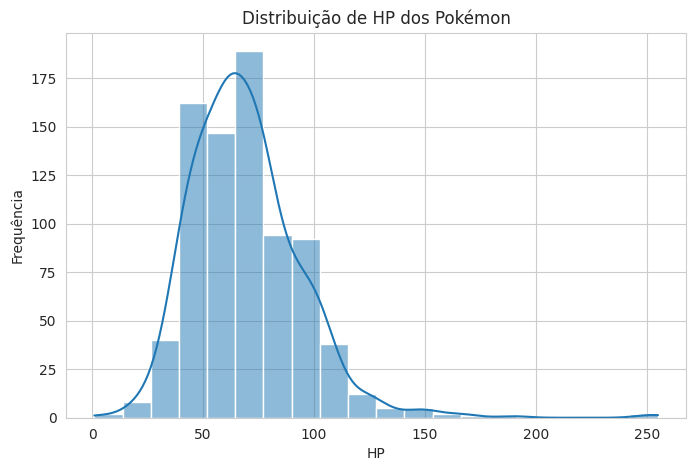

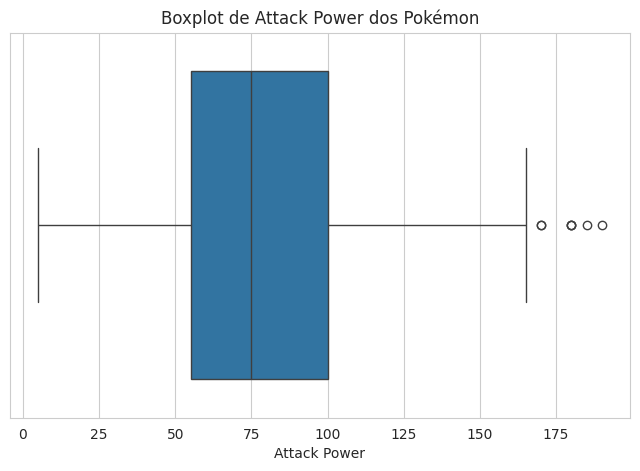

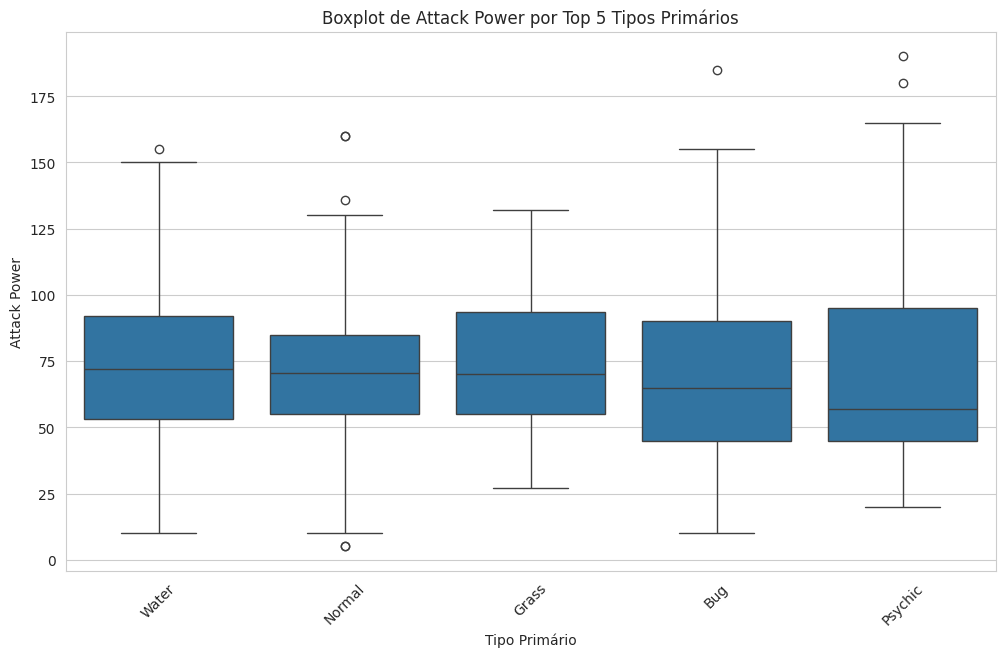

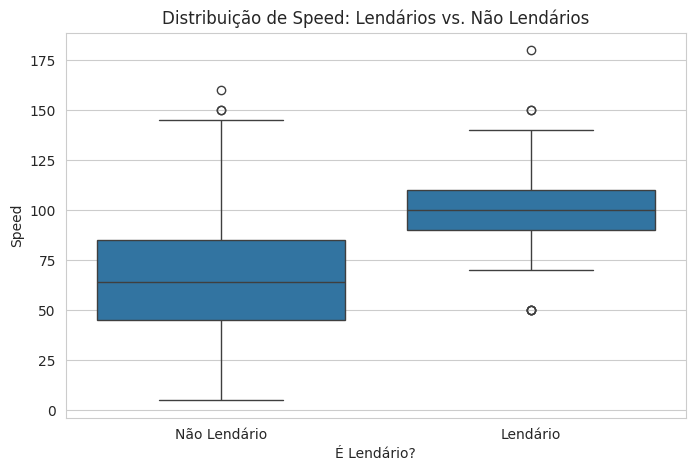

In [17]:
# Histograma para o atributo 'HP'
plt.figure(figsize=(8,5))
sns.histplot(df_pokemon['HP'], kde=True, bins=20) # kde=True adiciona uma estimativa da densidade do kernel
plt.title('Distribuição de HP dos Pokémon')
plt.xlabel('HP')
plt.ylabel('Frequência')
plt.show()

# Boxplot para o atributo 'Attack'
plt.figure(figsize=(8,5))
sns.boxplot(x=df_pokemon['Attack Power'])
plt.title('Boxplot de Attack Power dos Pokémon')
plt.xlabel('Attack Power')
plt.show()

# Boxplots comparando 'Attack' por 'Type1' (apenas alguns tipos para melhor visualização)
# Primeiro, vamos ver os tipos mais comuns para selecionar alguns
top_types = df_pokemon['Type1'].value_counts().nlargest(5).index
df_top_types = df_pokemon[df_pokemon['Type1'].isin(top_types)]

plt.figure(figsize=(12,7))
sns.boxplot(x='Type1', y='Attack Power', data=df_top_types, order=top_types)
plt.title('Boxplot de Attack Power por Top 5 Tipos Primários')
plt.xlabel('Tipo Primário')
plt.ylabel('Attack Power')
plt.xticks(rotation=45)
plt.show()

# Boxplot comparando 'Speed' entre Pokémon Lendários e Não Lendários
plt.figure(figsize=(8,5))
sns.boxplot(x='Legendary', y='Speed', data=df_pokemon)
plt.title('Distribuição de Speed: Lendários vs. Não Lendários')
plt.xlabel('É Lendário?')
plt.ylabel('Speed')
plt.xticks([0, 1], ['Não Lendário', 'Lendário']) # Melhora os rótulos do eixo x
plt.show()

## 📜 Tabelas de Frequência

Tabelas de frequência mostram quantas vezes cada valor (ou categoria) aparece em um conjunto de dados. São muito úteis para variáveis categóricas.

Podemos também criar tabelas de frequência para variáveis numéricas "discretizando-as", ou seja, agrupando valores em classes ou intervalos.

Tabela de Frequência para 'Type1':
Type1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

Tabela de Frequência Relativa para 'Type1':
Type1
Water       14.000
Normal      12.250
Grass        8.750
Bug          8.625
Psychic      7.125
Fire         6.500
Rock         5.500
Electric     5.500
Ground       4.000
Ghost        4.000
Dragon       4.000
Dark         3.875
Poison       3.500
Fighting     3.375
Steel        3.375
Ice          3.000
Fairy        2.125
Flying       0.500
Name: proportion, dtype: float64


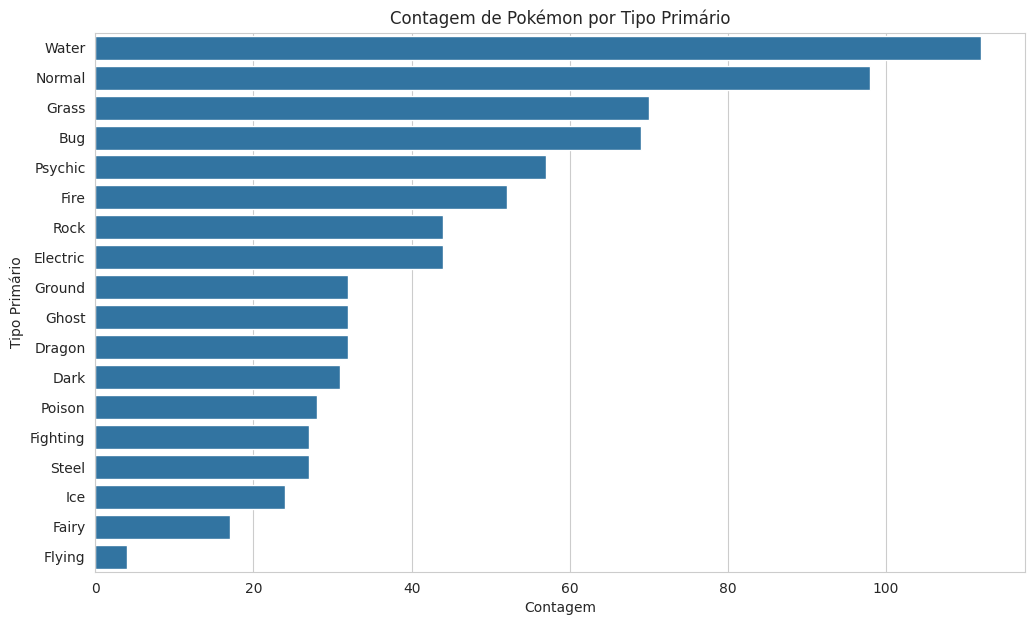


Tabela de Frequência para 'Generation':
Generation
1    166
2    106
3    160
4    121
5    165
6     82
Name: count, dtype: int64

Tabela de Frequência para Classes de HP:
HP_Class
0-40        50
41-80      514
81-120     209
121-160     21
>160         6
Name: count, dtype: int64


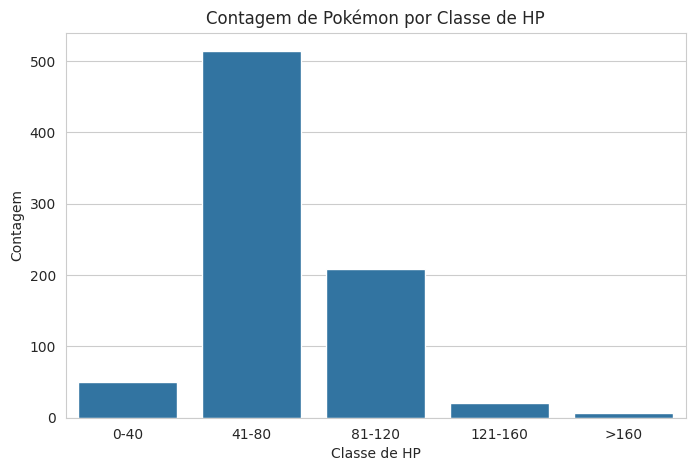

In [18]:
# Tabela de frequência para 'Type1'
print("Tabela de Frequência para 'Type1':")
freq_type1 = df_pokemon['Type1'].value_counts()
print(freq_type1)

# Tabela de frequência relativa (porcentagem) para 'Type1'
print("\nTabela de Frequência Relativa para 'Type1':")
freq_rel_type1 = df_pokemon['Type1'].value_counts(normalize=True) * 100
print(freq_rel_type1)

# Visualizar com um gráfico de barras
plt.figure(figsize=(12,7))
sns.countplot(y='Type1', data=df_pokemon, order=df_pokemon['Type1'].value_counts().index)
plt.title('Contagem de Pokémon por Tipo Primário')
plt.xlabel('Contagem')
plt.ylabel('Tipo Primário')
plt.show()

# Tabela de frequência para 'Generation'
print("\nTabela de Frequência para 'Generation':")
freq_generation = df_pokemon['Generation'].value_counts().sort_index() # sort_index para ordenar pela geração
print(freq_generation)

# Criando classes para o atributo 'HP'
# Definir os limites dos intervalos (bins)
# Ex: 0-40, 41-80, 81-120, 121-160, >160
bins_hp = [0, 40, 80, 120, 160, df_pokemon['HP'].max() + 1] # +1 para incluir o valor máximo
labels_hp = ['0-40', '41-80', '81-120', '121-160', '>160']

# Criar uma nova coluna com as classes de HP
df_pokemon['HP_Class'] = pd.cut(df_pokemon['HP'], bins=bins_hp, labels=labels_hp, right=False) # right=False significa [inicio, fim)

print("\nTabela de Frequência para Classes de HP:")
freq_hp_class = df_pokemon['HP_Class'].value_counts().sort_index()
print(freq_hp_class)

# Visualizar classes de HP
plt.figure(figsize=(8,5))
sns.countplot(x='HP_Class', data=df_pokemon, order=labels_hp)
plt.title('Contagem de Pokémon por Classe de HP')
plt.xlabel('Classe de HP')
plt.ylabel('Contagem')
plt.show()

## 🔗 Correlação entre Variáveis

Correlação mede a força e a direção da relação linear entre duas variáveis numéricas. O coeficiente de correlação de Pearson varia de -1 a +1:
* **+1:** Correlação linear positiva perfeita.
* **-1:** Correlação linear negativa perfeita.
* **0:** Nenhuma correlação linear.

**Importante:** Correlação não implica causalidade!

Usaremos gráficos de dispersão (scatter plots) para visualizar a relação entre duas variáveis e uma matriz de correlação para ver as correlações entre várias variáveis de uma vez.

Matriz de Correlação:
                     HP  Attack Power  Defense Power    Sp_Atk    Sp_Def  \
HP             1.000000      0.422386       0.239622  0.362380  0.378718   
Attack Power   0.422386      1.000000       0.438687  0.396362  0.263990   
Defense Power  0.239622      0.438687       1.000000  0.223549  0.510747   
Sp_Atk         0.362380      0.396362       0.223549  1.000000  0.506121   
Sp_Def         0.378718      0.263990       0.510747  0.506121  1.000000   
Speed          0.175952      0.381240       0.015227  0.473018  0.259133   
Generation     0.058683      0.051451       0.042419  0.036437  0.028486   

                  Speed  Generation  
HP             0.175952    0.058683  
Attack Power   0.381240    0.051451  
Defense Power  0.015227    0.042419  
Sp_Atk         0.473018    0.036437  
Sp_Def         0.259133    0.028486  
Speed          1.000000   -0.023121  
Generation    -0.023121    1.000000  


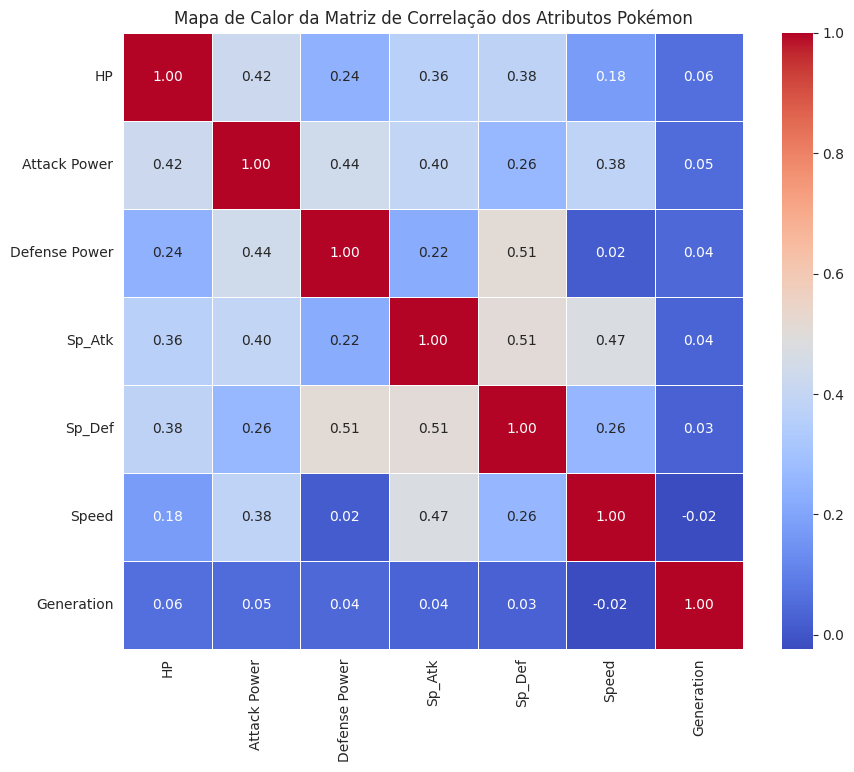

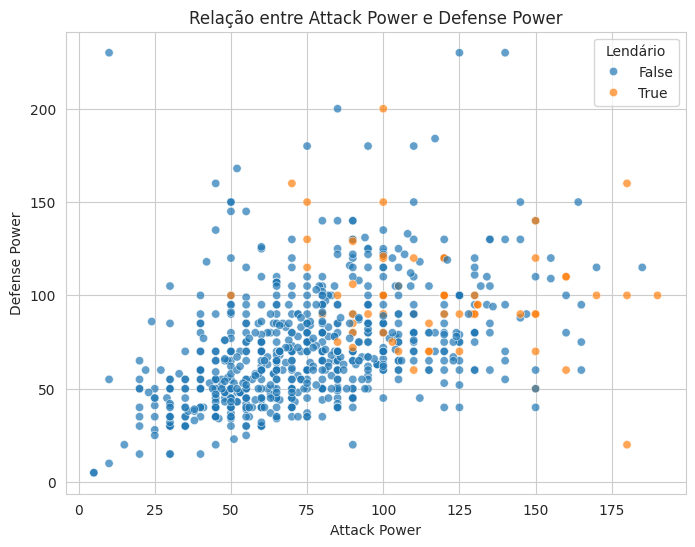

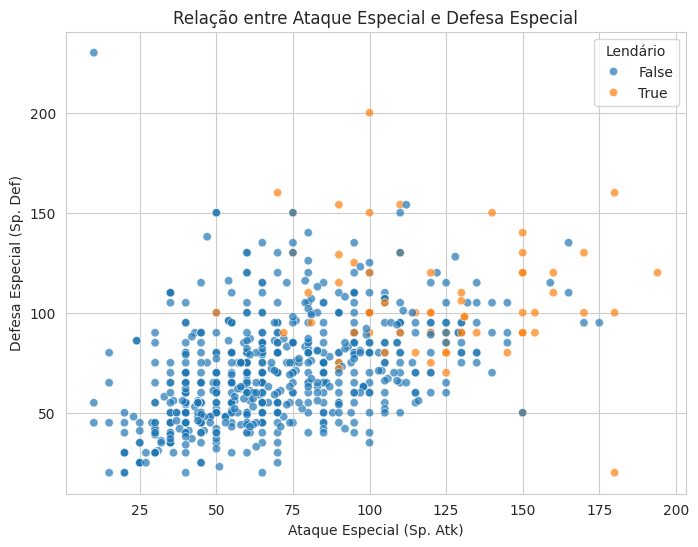

In [19]:
# Selecionar apenas colunas numéricas para a matriz de correlação
numerical_cols = df_pokemon.select_dtypes(include=np.number).columns.tolist()
# Remover 'ID' e 'Generation' se não quisermos correlacioná-los com atributos de combate de forma primária,
# ou deixar 'Generation' para ver se há alguma tendência. Vamos remover 'ID'.
numerical_cols.remove('ID')
# A coluna Legendary é booleana, mas o pandas a trata como 0 e 1, então pode ser incluída.

# Calcular a matriz de correlação
correlation_matrix = df_pokemon[numerical_cols].corr()

print("Matriz de Correlação:")
print(correlation_matrix)

# Visualizar a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Matriz de Correlação dos Atributos Pokémon')
plt.show()

# Gráfico de dispersão (Scatter Plot) entre 'Attack' e 'Defense'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Attack Power', y='Defense Power', data=df_pokemon, hue='Legendary', alpha=0.7) # hue para colorir por Lendário
plt.title('Relação entre Attack Power e Defense Power')
plt.xlabel('Attack Power')
plt.ylabel('Defense Power')
plt.legend(title='Lendário')
plt.show()

# Gráfico de dispersão (Scatter Plot) entre 'Sp_Atk' e 'Sp_Def'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sp_Atk', y='Sp_Def', data=df_pokemon, hue='Legendary', alpha=0.7)
plt.title('Relação entre Ataque Especial e Defesa Especial')
plt.xlabel('Ataque Especial (Sp. Atk)')
plt.ylabel('Defesa Especial (Sp. Def)')
plt.legend(title='Lendário')
plt.show()

## 🎲 Amostragem (Uma Breve Introdução)

Em muitos cenários do mundo real, não temos acesso a toda a "população" de dados. Em vez disso, trabalhamos com uma **amostra** – um subconjunto representativo da população.

A estatística descritiva pode ser aplicada tanto à população completa (como estamos fazendo aqui com todos os 800 Pokémon do nosso dataset) quanto a amostras.

Vamos ver como tirar uma amostra aleatória simples dos nossos Pokémon e comparar algumas de suas estatísticas com as da população total.

In [20]:
# Definir o tamanho da amostra
tamanho_amostra = 50

# Tirar uma amostra aleatória simples sem reposição
# random_state é para garantir reprodutibilidade, para que todos obtenham a mesma amostra
amostra_pokemon = df_pokemon.sample(n=tamanho_amostra, random_state=42)

print(f"Primeiras 5 linhas da amostra de {tamanho_amostra} Pokémon:")
print(amostra_pokemon.head())

print(f"\nInformações da amostra:")
amostra_pokemon.info()

# Comparar a média de 'Attack' da população e da amostra
media_attack_populacao = df_pokemon['Attack Power'].mean()
media_attack_amostra = amostra_pokemon['Attack Power'].mean()

print(f"\nMédia de Attack Power (População Total): {media_attack_populacao:.2f}")
print(f"Média de Attack Power (Amostra de {tamanho_amostra}): {media_attack_amostra:.2f}")

# Comparar a mediana de 'HP' da população e da amostra
mediana_hp_populacao = df_pokemon['HP'].median()
mediana_hp_amostra = amostra_pokemon['HP'].median()

print(f"\nMediana de HP (População Total): {mediana_hp_populacao:.2f}")
print(f"Mediana de HP (Amostra de {tamanho_amostra}): {mediana_hp_amostra:.2f}")

# Comparar a contagem de Pokémon Lendários na população e na amostra (em proporção)
prop_lendarios_populacao = df_pokemon['Legendary'].value_counts(normalize=True).get(True, 0) * 100
prop_lendarios_amostra = amostra_pokemon['Legendary'].value_counts(normalize=True).get(True, 0) * 100

print(f"\nProporção de Lendários (População Total): {prop_lendarios_populacao:.2f}%")
print(f"Proporção de Lendários (Amostra de {tamanho_amostra}): {prop_lendarios_amostra:.2f}%")

Primeiras 5 linhas da amostra de 50 Pokémon:
      ID        Name     Type1   Type2  HP  Attack Power  Defense Power  \
696  697   Hydreigon      Dark  Dragon  92           105             90   
667  668    Beheeyem   Psychic     NaN  75            75             75   
63    64   Growlithe      Fire     NaN  55            70             45   
533  534  Wash Rotom  Electric   Water  50            65            107   
66    67   Poliwhirl     Water     NaN  65            65             65   

     Sp_Atk  Sp_Def  Speed  Generation  Legendary HP_Class  
696     125      90     98           5      False   81-120  
667     125      95     40           5      False    41-80  
63       70      50     60           1      False    41-80  
533     105     107     86           4      False    41-80  
66       50      50     90           1      False    41-80  

Informações da amostra:
<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 696 to 534
Data columns (total 13 columns):
 #   Column 

1. Média: Attack. Mediana: Attack. Se a média divergir muito da mediana, é indicada a presença de outliers, visto que a média é suscetível a variações devido a outliers, diferente da mediana, além disso, a distribuição do atributo será assimétrica para a esquerda ou para a direita. De mesmo modo, se a média e a mediana forem próximo, indica que não há outliers, e a distribuição é simétrica.

2. Ataque Escecial (Sp. Attack).  Isso significa que este atributo é distribuído de forma heterogênia entre os Pokémons, ou seja, há maior variação entre os indivíduos quando se trata do atributo Sp. Attack.

3.Water/Flying são os atributos mais e menos comuns, respectivamente. Iremos ignorar os indivíduos que não possuem tipo secundário nessa contagem. Pode-se observar que o tipo secundário mais comum é "Flying" e o menos comum é "Bug".

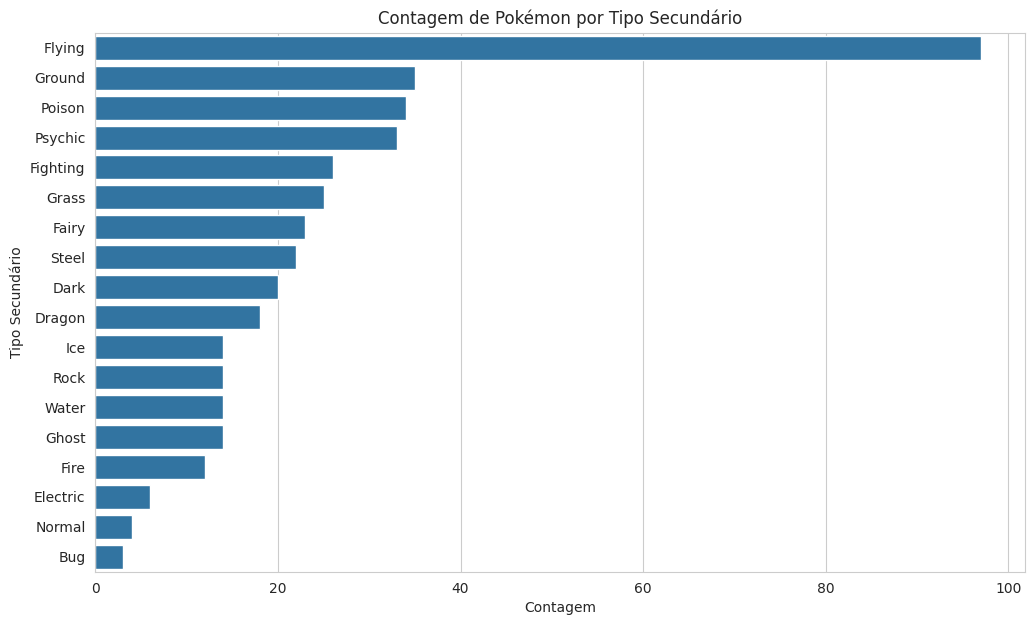

In [21]:
#3:
# Visualizar com um gráfico de barras
plt.figure(figsize=(12,7))
sns.countplot(y='Type2', data=df_pokemon, order=df_pokemon['Type2'].value_counts().index)
plt.title('Contagem de Pokémon por Tipo Secundário')
plt.xlabel('Contagem')
plt.ylabel('Tipo Secundário')
plt.show()

4.Assimétrica à direita. Bug e Psychic são os dois mais baixos, enquanto Psychic é também o mais alto. Contudo, não são diferenças muito significativas, estando todos abaixo de 100, e apenas 2 (Bug e Psychic) um pouco abaixo de 50.

5.1. A correlação mais forte na matriz é "1", entre os atributos e eles mesmos. Desconsiderando a correlação entre o mesmo atributo, a mais forte seria "0.51". É uma correlação positiva, o que indica que quando uma variável aumenta, a outra também tende a aumentar. 
5.2. Ambas apresentam correlações moderadas, definidas no intervalo de +- 0,3 a +-0,7. Indicaria que os Pokémons mais rápidos são também os que possuem ataques mais poderosos.
5.3. A relação se apresenta moderadamente linear, contudo existem Pokemons que fogem da tendência geral, sendo assim, considerados outliers.



In [22]:
# Selecionar colunas de atributos de combate
stats_cols = ['HP', 'Attack Power', 'Defense Power', 'Sp_Atk', 'Sp_Def', 'Speed']

print("Médias dos atributos de combate dos lendários:")
print(df_pokemon.groupby('Legendary')[stats_cols].mean())

print("\nMedianas dos atributos de combate dos lendários:")
print(df_pokemon.groupby('Legendary')[stats_cols].median())

Médias dos atributos de combate dos lendários:
                  HP  Attack Power  Defense Power      Sp_Atk      Sp_Def  \
Legendary                                                                   
False      67.182313     75.669388      71.559184   68.454422   68.892517   
True       92.738462    116.676923      99.661538  122.184615  105.938462   

                Speed  
Legendary              
False       65.455782  
True       100.184615  

Medianas dos atributos de combate dos lendários:
             HP  Attack Power  Defense Power  Sp_Atk  Sp_Def  Speed
Legendary                                                          
False      65.0          72.0           66.0    65.0    65.0   64.0
True       91.0         110.0          100.0   120.0   100.0  100.0


6. Sim, tanto a média como a mediana dos lendários supera significativamente a média e mediana dos pokemons não lendários. Com exceção da presença de alguns outliers, tendem a ser consistementente altos.

In [23]:
#7.
# Selecionar colunas de atributos de combate
stats_cols = ['HP', 'Attack Power', 'Defense Power']

print("Médias dos atributos de combate por geração:")
print(df_pokemon.groupby('Generation')[stats_cols].mean())


Médias dos atributos de combate por geração:
                   HP  Attack Power  Defense Power
Generation                                        
1           65.819277     76.638554      70.861446
2           71.207547     72.028302      73.386792
3           66.543750     81.625000      74.100000
4           73.082645     82.867769      78.132231
5           71.787879     82.066667      72.327273
6           68.268293     75.804878      76.682927


7. Nenhum dos atributos apresenta grande variação, tampouco crescimento ou decrescimento linear. Contudo, observa-se que a geração 4 possui os pokemons mais poderosos.

8.1. Se aproximaram da população total, contudo, ainda há significativa diferença em alguns parâmetros, como por exemplo, no percentual de pokemons lendários.
8.2. Quanto maior a amostra, mais aproximados os dados ficarão da população total, visto que haverá mais espaço para as diferenças existentes na população "aparecerem" nas amostras.

In [24]:
#9.
# Criando classes para o atributo 'HP'
# Definir os limites dos intervalos (bins)
# Ex: 0-40, 41-80, 81-120, 121-160, >160
bins_hp = [0, 40, 80, 120, 160, df_pokemon.groupby('Legendary')['HP'].max() + 1] # +1 para incluir o valor máximo
labels_hp = ['0-40', '41-80', '81-120', '121-160', '>160']

# Criar uma nova coluna com as classes de HP
df_pokemon.groupby('Legendary')['HP_Class'] = pd.cut(df_pokemon.groupby('Legendary')['HP'], bins=bins_hp, labels=labels_hp, right=False) # right=False significa [inicio, fim)

print("\nTabela de Frequência para Classes de HP:")
freq_hp_class = df_pokemon.groupby('Legendary')['HP_Class'].value_counts().sort_index()
print(freq_hp_class)

# Visualizar classes de HP
plt.figure(figsize=(8,5))
sns.countplot(x='HP_Class', data=df_pokemon.groupby('Legendary'), order=labels_hp)
plt.title('Contagem de Pokémon por Classe de HP')
plt.xlabel('Classe de HP')
plt.ylabel('Contagem')
plt.show()

TypeError: unhashable type: 'Series'

10. Pessoalmente, como alguém que não conhece/acompanha este universo, foi surpreendente observar como existem tantas variações, e como podemos analisá-las de maneira estatística.

# ATV1 - Questões para Reflexão e Análise

Agora é a sua vez de explorar e pensar sobre os dados! Responda às seguintes perguntas com base nas análises que fizemos e em novas explorações que você pode realizar. Não se limite a números; interprete os resultados!

1.  **Tendência Central dos Atributos:**
    * Qual atributo de combate (`HP`, `Attack`, `Defense`, `Sp_Atk`, `Sp_Def`, `Speed`) possui a maior média? E a maior mediana?
    * Se a média e a mediana de um atributo são muito diferentes, o que isso pode indicar sobre a distribuição desse atributo? (Dica: pense em outliers ou assimetria).

2.  **Dispersão dos Atributos:**
    * Qual atributo de combate apresenta a maior variabilidade (maior desvio padrão)? O que isso significa na prática para os Pokémon?
    * Olhando para o boxplot de `Speed` comparando Lendários e Não Lendários, qual grupo parece ter uma `Speed` mais consistente (menor dispersão)?

3.  **Tipos de Pokémon:**
    * Qual é o tipo primário (`Type1`) mais comum de Pokémon? E o menos comum?
    * Crie um gráfico de barras para a frequência de `Type2`. Lembre-se de como lidar com os valores ausentes para esta visualização (eles podem ser uma categoria "Nenhum" ou serem ignorados na contagem, dependendo do seu objetivo). O que você observa?

4.  **Distribuições:**
    * Observe o histograma de `HP`. A distribuição parece ser simétrica, assimétrica à direita (cauda longa para valores altos) ou assimétrica à esquerda (cauda longa para valores baixos)?
    * Compare os boxplots de `Attack` para os 5 tipos primários mais comuns. Existe algum tipo que se destaca por ter valores de `Attack` consistentemente mais altos ou mais baixos?

5.  **Correlações:**
    * Qual é a correlação mais forte (positiva ou negativa, ignorando o sinal por um momento) que você observou entre os atributos de combate na matriz de correlação? Interprete essa correlação. (Ex: Se `Attack` e `Defense` têm correlação positiva, o que isso sugere?)
    * Existe alguma correlação forte entre `Speed` e os atributos de ataque (`Attack`, `Sp_Atk`)? O que isso poderia significar em termos de estratégia de batalha Pokémon?
    * Observe o gráfico de dispersão entre `Attack` e `Defense`. A relação parece ser estritamente linear? Há muitos Pokémon que fogem da tendência geral?

6.  **Pokémon Lendários:**
    * Em geral, os Pokémon Lendários tendem a ter estatísticas de combate mais altas do que os não Lendários? Use as médias ou medianas dos atributos de combate, separando por `Legendary`, para embasar sua resposta. (Dica: você pode usar `df_pokemon.groupby('Legendary')[stats_cols].mean()`).
    * Observando os boxplots que construímos, os Pokémon Lendários parecem ter uma maior variabilidade em algum atributo específico em comparação com os não Lendários, ou são consistentemente altos em todos?

7.  **Gerações:**
    * Calcule a média de `HP`, `Attack` e `Defense` para cada `Generation`. Há alguma tendência perceptível no "poder" médio dos Pokémon ao longo das gerações?
    * Qual geração introduziu o maior número de Pokémon?

8.  **Amostragem:**
    * Ao comparar as estatísticas da amostra com as da população total, quão próximas elas ficaram?
    * Se você tirasse uma amostra muito pequena (ex: 5 Pokémon), você esperaria que as estatísticas da amostra fossem mais ou menos representativas da população total em comparação com a amostra de 50 Pokémon? Por quê?

9.  **Exploração Livre (HP por Classes):**
    * Analisando a tabela de frequência das classes de `HP` que criamos, qual classe de `HP` é a mais comum?
    * Os Pokémon Lendários estão mais concentrados em classes de `HP` mais altas? (Dica: filtre o DataFrame para Lendários e depois veja a distribuição de `HP_Class`).

10. **Conclusão Pessoal e Insight:**
    * Qual foi a descoberta mais interessante ou surpreendente que você fez ao analisar este universo de Pokémon? Descreva-a e explique por que chamou sua atenção.

In [ ]:
#Para questão, crie uma célula de código ou markdown para colocar suas respostas. Soluções em formato código são exigidas somente para os exercícios 3, 6, 7, 9.